# WorkFlow
## Loading the daat
## Cleaning the data
## Feature Enginnering
## Visualizing data
## Preproccessing
## Modelling
## Repeat untill I get 82.5% val accuracy

In [535]:
!nvidia-smi 

Sun Apr 25 22:41:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 3060    Off  | 00000000:26:00.0  On |                  N/A |
|  0%   54C    P8    13W / 170W |    526MiB / 12045MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [536]:
# !unzip ./data.zip

## Loading the data

In [537]:
import pandas as pd
data = pd.read_csv('./heart.csv')

In [538]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Cleaning data

In [539]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [540]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [541]:
data['oldpeak'] = data['oldpeak'].astype(int)

In [542]:
data.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

## Feature Enginnering

In [543]:
len(data)

303

In [544]:
from sklearn.model_selection import *
from sklearn.metrics import *

In [545]:
import numpy as np
results = []
for _ in range(100):
    X = data.drop('target',axis=1)
    y = data['target']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier()
    model.fit(X_train,y_train)
    results.append(model.score(X_test,y_test))
np.mean(results)

0.8014473684210525

In [546]:
def fe(data,col):
    print(len(data))
    max_no = data[col].quantile(0.95)
    min_no = data[col].quantile(0.05)
    data = data[data[col]<max_no]
    data = data[data[col]>min_no]
    max_no = data[col].mean() + 3*data[col].std()
    min_no = data[col].mean() + -3*data[col].std()
    data = data[data[col]<max_no]
    data = data[data[col]>min_no]
    print(len(data))
    return data

In [547]:
cols = list(data.columns)

In [548]:
cols

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [549]:
import seaborn as sns

In [550]:
cols = ['age',
 'trestbps',
 'chol',
 'ca']

In [551]:
for col in cols:
    print('*'*50)
    print(col)
    data = fe(data,col)
    print(col)
    print('*'*50)

**************************************************
age
303
270
age
**************************************************
**************************************************
trestbps
270
237
trestbps
**************************************************
**************************************************
chol
237
212
chol
**************************************************
**************************************************
ca
212
76
ca
**************************************************


In [552]:
import numpy as np
results = []
for _ in range(100):
    X = data.drop('target',axis=1)
    y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
results.append(model.score(X_test,y_test))
print(np.mean(results))

0.8947368421052632


## Visualizing

In [553]:
data.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

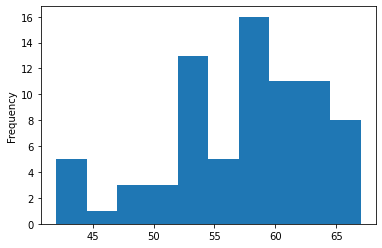

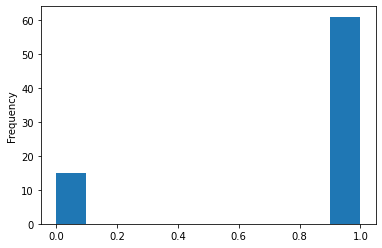

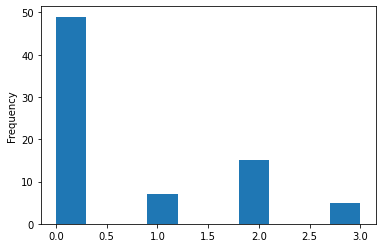

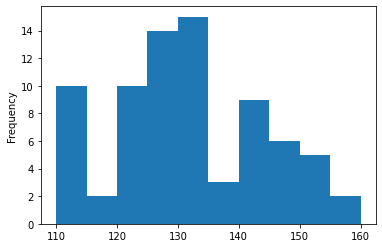

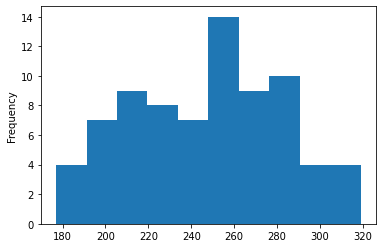

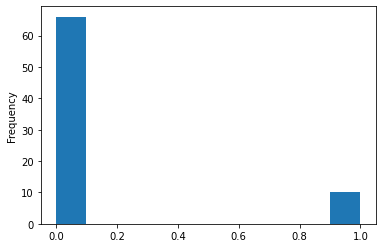

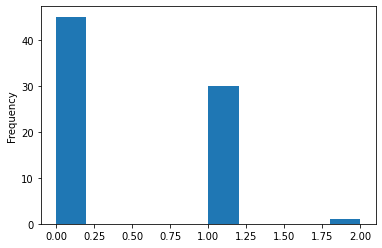

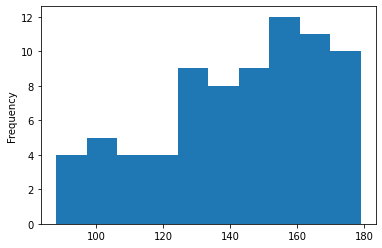

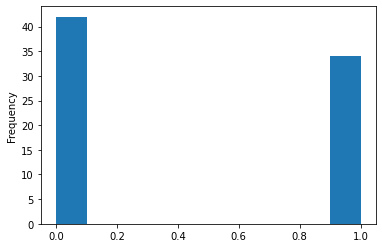

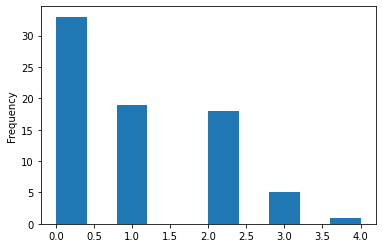

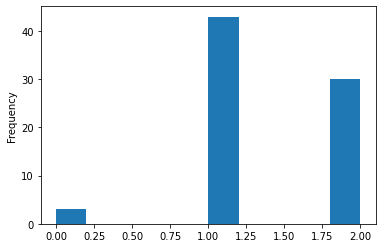

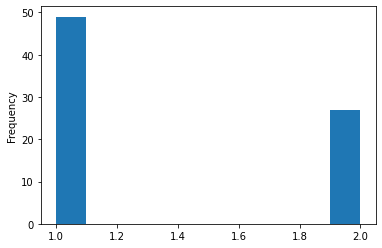

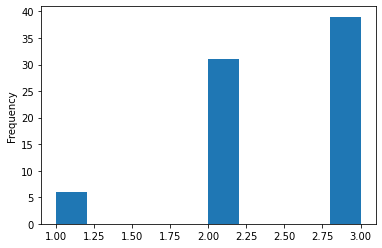

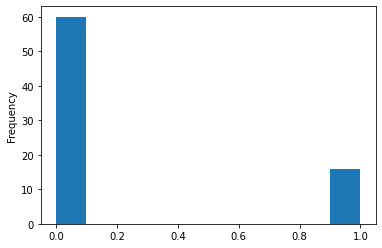

In [555]:
for col in list(data.columns):
    import matplotlib.pyplot as plt
    plt.figure()
    data[col].plot.hist()

<AxesSubplot:>

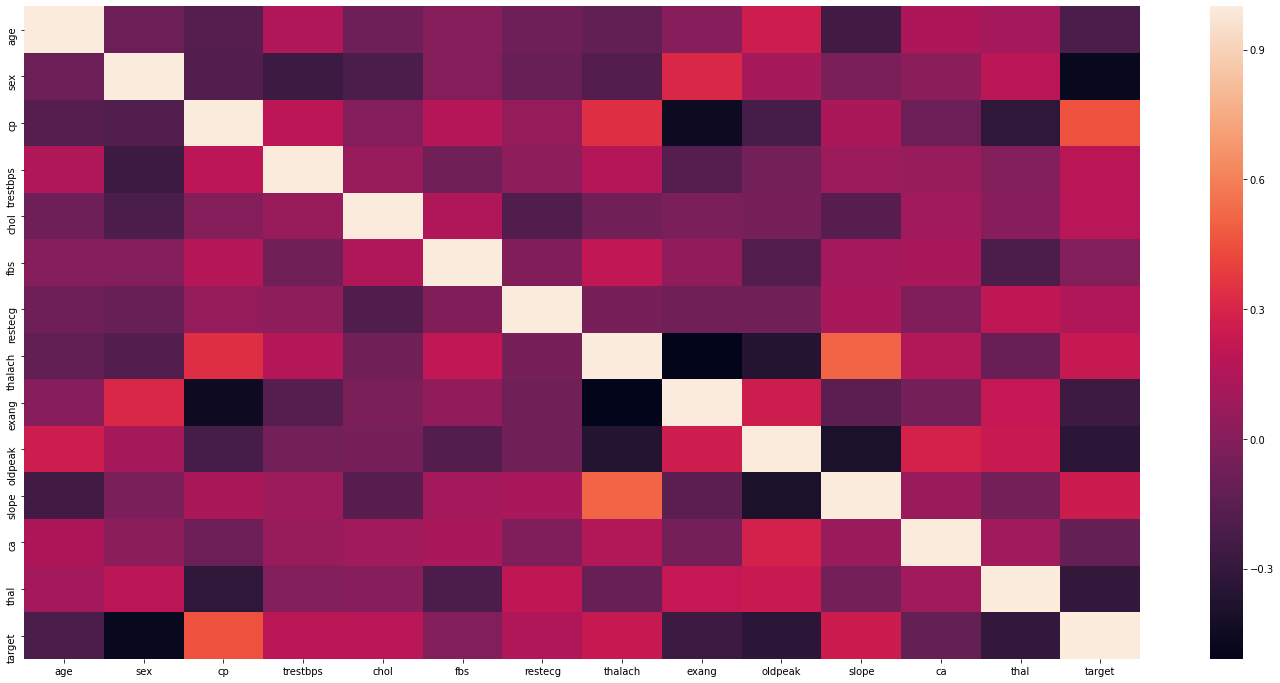

In [556]:
plt.figure(figsize=(25,12))
sns.heatmap(data.corr())

## Preproccessing

In [557]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,OneHotEncoder,LabelEncoder,Normalizer

In [558]:
from sklearn.compose import make_column_transformer


In [560]:
y_old = y
X_old = X
X_train_old,X_test_old,y_train_old,y_test_old = X_train,X_test,y_train,y_test

In [562]:
list(data.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [569]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
33,54,1,2,125,273,0,0,152,0,0,0,1,2
34,51,1,3,125,213,0,0,125,1,1,2,1,2
40,51,0,2,140,308,0,0,142,0,1,2,1,2
55,52,1,1,134,201,0,1,158,0,0,2,1,2
59,57,0,0,128,303,0,0,159,0,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,57,1,1,154,232,0,0,164,0,0,2,1,2
289,55,0,0,128,205,0,2,130,1,2,1,1,3
290,61,1,0,148,203,0,1,161,0,0,2,1,3
295,63,1,0,140,187,0,0,144,1,4,2,2,3


In [577]:
label_encoder = False

In [601]:
# pres = [StandardScaler(),RobustScaler(),MinMaxScaler(),MaxAbsScaler(),Normalizer()]
# for pre in pres:
#     print(pre)
#     pre.fit(X)
#     if label_encoder is True:
#         le = LabelEncoder()
#         le.fit(y)
#         y = le.transform(y)
#     y = y_old
#     model = GradientBoostingClassifier()
#     model.fit(pre.transform(X),y)
#     print(model.score(X,y))

In [602]:
## MinMaxScalar Wins Label Encoder = False 0.8289473684210527
## MaxAbsScaler Wins Label Encoder = True 0.8026315789473685

In [584]:
pre = MinMaxScaler()
pre.fit(X)
X_train = pre.transform(X_train_old)
X_test = pre.transform(X_test_old)

/home/indika/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [586]:
y_train = y_train_old
y_test = y_test_old

## Modelling

In [587]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,RidgeClassifier,RidgeClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier,CatBoost

In [588]:
models = [
    ['KNeighborsClassifier',KNeighborsClassifier],
    ['LogisticRegression',LogisticRegression],
    ['LogisticRegressionCV',LogisticRegressionCV],
    ['RidgeClassifier',RidgeClassifier],
    ['RidgeClassifierCV',RidgeClassifierCV],
    ['GaussianNB',GaussianNB],
    ['DecisionTreeClassifier',DecisionTreeClassifier],
    ['GradientBoostingClassifier',GradientBoostingClassifier],
    ['AdaBoostClassifier',AdaBoostClassifier],
    ['RandomForestClassifier',RandomForestClassifier],
    ['BaggingClassifier',BaggingClassifier],
    ['SVC',SVC],
    ['XGBClassifier',XGBClassifier],
    ['XGBRFClassifier',XGBRFClassifier],
    ['CatBoostClassifier',CatBoostClassifier],
]

In [590]:
results = {}

In [603]:
# for model in models:
#     print('*'*50)
#     model_name = model[0]
#     print(model_name)
#     model = model[1]()
#     model.fit(X=X_train,y=y_train)
#     preds = model.predict(X_test)
#     results[model_name] = accuracy_score(y_test,preds)
#     print('*'*50)

In [604]:
results

{'KNeighborsClassifier': 0.7894736842105263,
 'LogisticRegression': 0.8421052631578947,
 'LogisticRegressionCV': 0.7368421052631579,
 'RidgeClassifier': 0.8947368421052632,
 'RidgeClassifierCV': 0.8421052631578947,
 'GaussianNB': 0.9473684210526315,
 'DecisionTreeClassifier': 0.7894736842105263,
 'GradientBoostingClassifier': 0.8947368421052632,
 'AdaBoostClassifier': 0.9473684210526315,
 'RandomForestClassifier': 0.7368421052631579,
 'BaggingClassifier': 0.8947368421052632,
 'SVC': 0.7368421052631579,
 'XGBClassifier': 0.8947368421052632,
 'XGBRFClassifier': 0.8421052631578947,
 'CatBoostClassifier': 0.8947368421052632}

In [605]:
results['AdaBoostClassifier']

0.9473684210526315

In [606]:
results['GaussianNB']

0.9473684210526315

In [607]:
abc = AdaBoostClassifier()
gnb = GaussianNB()

In [608]:
vc = VotingClassifier(estimators=[('gnb',gnb),('abc',abc)],voting='soft')
vc.fit(X_train,y_train)
preds = vc.predict(X_test)
print(accuracy_score(y_test,preds))

0.9473684210526315


In [609]:
vc = VotingClassifier(estimators=[('gnb',gnb),('abc',abc)],voting='hard')
vc.fit(X_train,y_train)
preds = vc.predict(X_test)
print(accuracy_score(y_test,preds))

0.9473684210526315


In [610]:
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [611]:
abc.score(X_test,y_test)

0.9473684210526315

In [612]:
import pickle

In [614]:
pickle.dump(abc,open('./model-0.h5','wb'))